# Q1. Train a Perceptron.
## 1) Implement the perceptron training rule and get the appropriate parameters for
## a single perceptron.

In [180]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
data = ([2,3,0],[4,5,0],[11,11,1], [4,11,1], [12,5,0], [5,2,0], [6,1,0],[6,3,0],[2,10,1],[4,7,1],
                [13,8,0],[1,6,1],[6,9,1],[10,12,1],[8,3,0],[2,8,1])

In [182]:
data = np.asarray(data)

In [204]:
def perceptron(data, num_iter,l_rate):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # initialize weights as zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            delta = (label - target)
            if(delta): # misclassified
                misclassified += 1
                w += l_rate*(delta * x)
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 100
l_rate = 0.001
w, misclassified_ = perceptron(data, num_iter, l_rate)

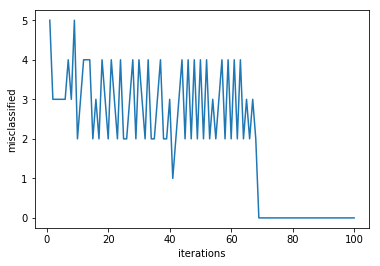

In [205]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [206]:
print('The weights after training perceptron are obtained as:', w)

The weights after training perceptron are obtained as: [[-0.076 -0.036  0.043]]


## 2) Implement Delta rule / Widrow-Hoff batch update rule.

In [501]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter=100):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        # weights
        self.weight = np.zeros(1 + X.shape[1])
        
        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            delta_w = 0
            err = 0
            for xi, target in zip(X, y):
                xi = np.insert(xi,0,1)
                delta_w += (target - self.net_input(xi)) * xi
            self.weight += self.rate * delta_w
            for xi, target in zip(X, y):
                xi = np.insert(xi,0,1)
                err += int((target - self.predict(xi)) != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X[1:], self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [502]:
l_rate = 0.001
num_iter = 100
pred = Perceptron(l_rate, num_iter) 
features = data[:, :-1]
labels = data[:, -1]

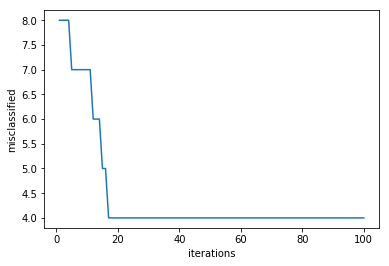

In [503]:
pred.fit(features, labels)
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, pred.errors)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [504]:
print('The weights after training perceptron using Delta rule is obtained as:',pred.weight)

The weights after training perceptron using Delta rule is obtained as: [ 0.00643078 -0.05668382  0.12827416]


## 3) Compare the results obtained through the two rules.

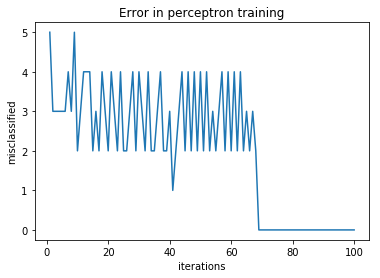

In [320]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.title('Error in perceptron training')
plt.show()

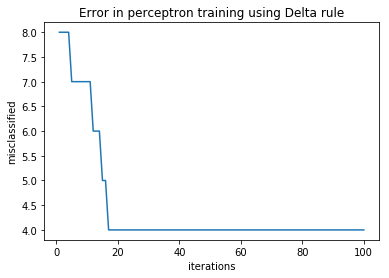

In [321]:
pred.fit(features, labels)
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, pred.errors)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.title('Error in perceptron training using Delta rule')
plt.show()

### As we can see in the above two graphs, the performance of the perceptron training using first algorithm is better for this data. The Delta rule algorithm converged to the least error as 4 while the fisrt algorithm converged to 0 error.

## 4) Plot the data points and the obtained decision boundary. 

In [507]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, algorithm, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = algorithm.predict(np.array([1,xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


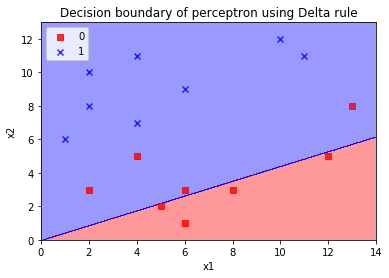

In [508]:
plot_decision_regions(features, labels, pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision boundary of perceptron using Delta rule')
plt.legend(loc='upper left')
plt.show()

## 5) Draw the schematic diagram of the trained perceptron with learned
## weights.

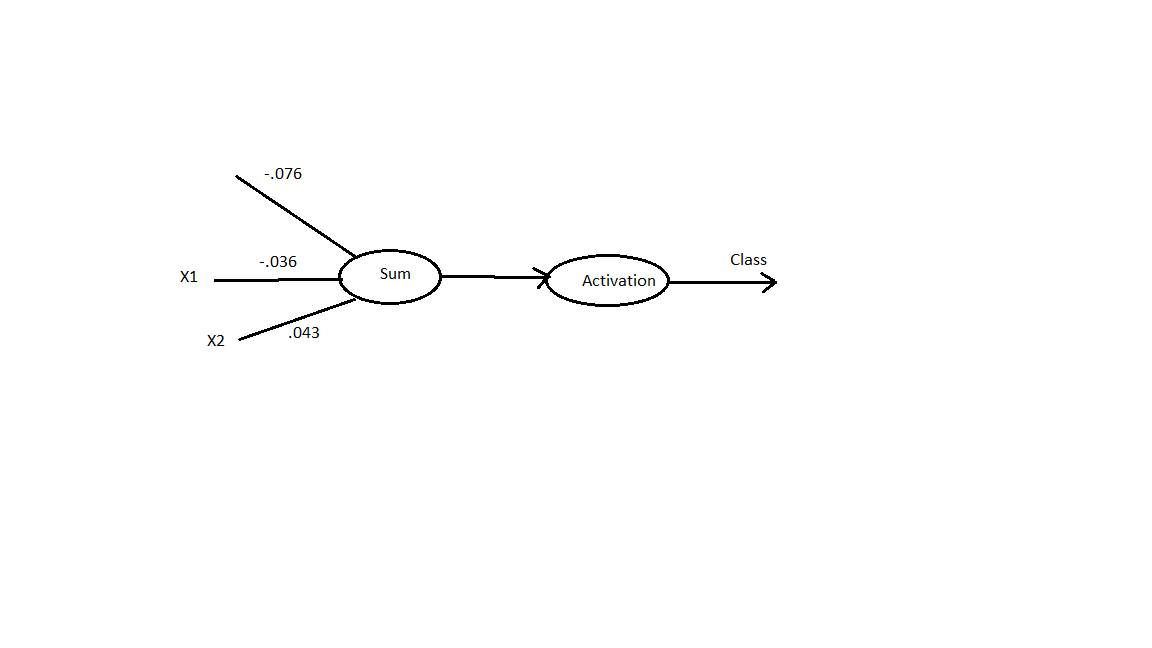

# Q2. Design a neural network to classify flowers from Iris dataset.
## 1) Implement a single hidden layer MLP. Final output layer will have 3 neurons,
## one for each result.

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width','petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url,names=names)

In [2]:
irisdata.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = irisdata.iloc[:, 0:4]
y = irisdata.iloc[:, 4:5]

In [4]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [6]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#transforming categorical values of y to numerical values as 0,1,2
y = y.apply(le.fit_transform)

In [8]:
y.Class.unique()

array([0, 1, 2], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#Applying MLP classifier of 1 hidden layer with 10 neurons
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
predictions = mlp.predict(X_test)

In [13]:
#Checking the models score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 2) Now use an NN with two hidden layers. The first hidden layer has 9 neurons.
## The second hidden layer has 3 neurons.

In [28]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


X = irisdata.iloc[:, 0:4]
y = irisdata.iloc[:, 4:5]

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)

# Build the model

model = Sequential()
# We are creating models with two hidden layer HL1 . Hl2 and one output layer.
# HL1 has activation fu ction as 'relu' and 9 neuroms. HL2 has activation as 'relu' and 3 neurons.
#Output layer has 3 nodes for output with function as 'softmax' to combine the probabilities.
model.add(Dense(9, input_shape=(4,), activation='relu', name='HL1'))
model.add(Dense(3, activation='relu', name='HL2'))
model.add(Dense(3, activation='softmax', name='Output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 9)                 45        
_________________________________________________________________
HL2 (Dense)                  (None, 3)                 30        
_________________________________________________________________
Output (Dense)               (None, 3)                 12        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 0s - loss: 1.0917 - accuracy: 0.3500
Epoch 2/100
 - 0s - loss: 1.0697 - accuracy: 0.3500
Epoch 3/100
 - 0s - loss: 1.0600 - accuracy: 0.4333
Epoch 4/100
 - 0s - loss: 1.0536 - accuracy: 0.4417
Epoch 5/100
 - 0s - loss: 1.0463 - accuracy: 0.5583
Epoch 6/100
 - 0s - loss: 1.0364 - accuracy: 0.6417
Epoch 7/100
 - 0s - loss: 1.0287 - accur

### Suitable activation functions for the model are 'relu' and 'softmax'.

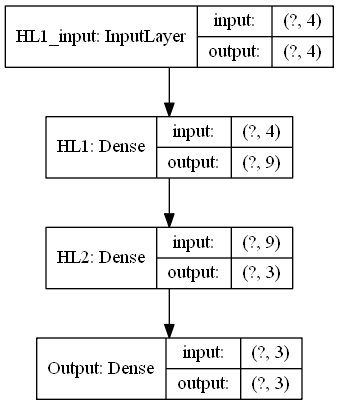

In [29]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

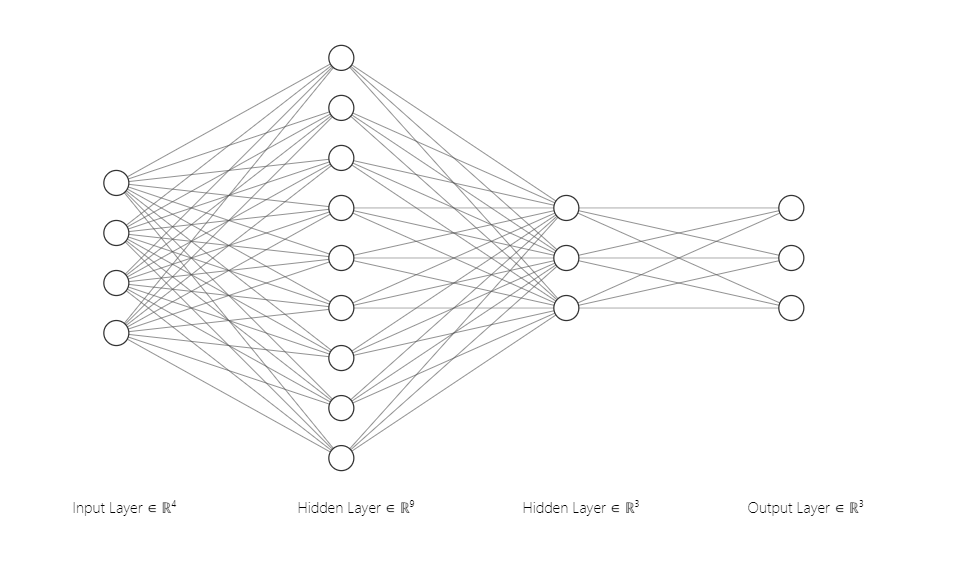